In [2]:
import numpy as np

# Create a 5x5 array with random integers between 1 and 100
array = np.random.randint(1, 101, size=(5, 5))
print("Original Array:\n", array)

# Extract and print the middle element of the array
middle_element = array[2, 2]
print("Middle Element:", middle_element)

# Calculate and print the mean of each row
row_means = np.mean(array, axis=1)
print("Mean of each row:", row_means)

# Create a new array that contains only the elements greater than the overall mean
overall_mean = np.mean(array)
greater_than_mean = array[array > overall_mean]
print("Elements greater than the overall mean:", greater_than_mean)

# Define the function to return elements in spiral order
def numpy_spiral_order(matrix):
    result = []
    while matrix.size:
        result.extend(matrix[0])  # Add the first row to result
        matrix = matrix[1:].T[::-1]  # Remove the first row and rotate the remaining array counter-clockwise
    return result

# Get the spiral order of the original array
spiral_order = numpy_spiral_order(array)
print("Spiral Order:", spiral_order)


Original Array:
 [[86 49 62 72 98]
 [17 54 23 39 93]
 [51 37 19 81 92]
 [32 31 32 83 36]
 [89 60 97 41  1]]
Middle Element: 19
Mean of each row: [73.4 45.2 56.  42.8 57.6]
Elements greater than the overall mean: [86 62 72 98 93 81 92 83 89 60 97]
Spiral Order: [86, 49, 62, 72, 98, 93, 92, 36, 1, 41, 97, 60, 89, 32, 51, 17, 54, 23, 39, 81, 83, 32, 31, 37, 19]


Saving videogamesales.csv to videogamesales.csv
                                                   Name Platform    Year  \
6109                                         Wii Sports      Wii  2006.0   
122                                   Super Mario Bros.      NES  1985.0   
8315                                     Mario Kart Wii      Wii  2008.0   
9743                                  Wii Sports Resort      Wii  2009.0   
705                            Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
10978       Military History: Commander - Europe at War       DS  2009.0   
7971            Puzzle Quest: Challenge of the Warlords      PSP  2007.0   
7972                         Race Driver: Create & Race       DS  2007.0   
10854                                   Cross Edge Dash     X360  2009.0   
9650   SCORE International Baja 1000: The Official Game      PS2  2008.0   

              Genre            Publishe

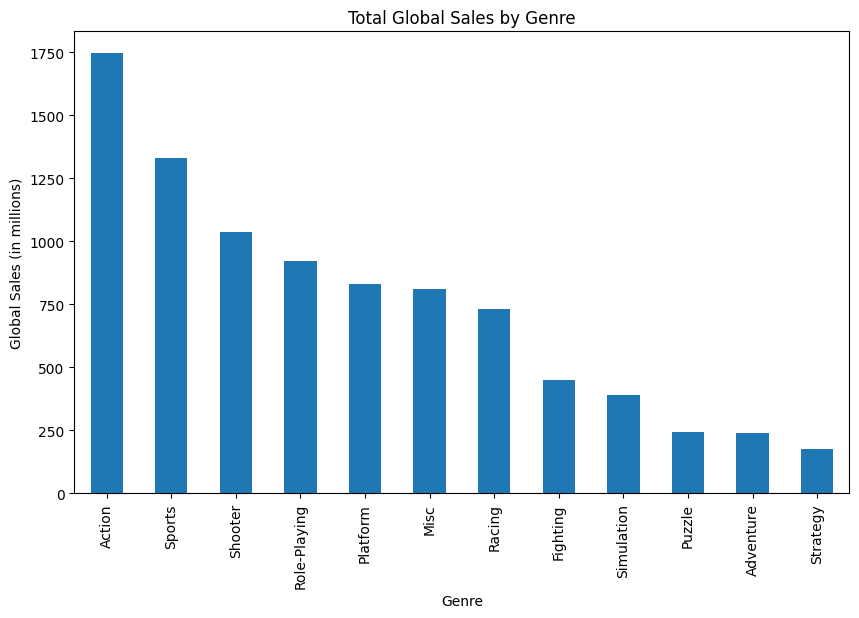

                                                    Name Platform    Year  \
999                                     Grand Theft Auto       PS  1997.0   
1290                                  Grand Theft Auto 2       PS  1998.0   
1469      Grand Theft Auto: Mission Pack #1, London 1969       PS  1998.0   
2323                                Grand Theft Auto III      PS2  2001.0   
2805                         Grand Theft Auto: Vice City      PS2  2002.0   
3563                                Grand Theft Auto III       PC  2002.0   
3639   Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   
3688   Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003.0   
4356                         Grand Theft Auto: Vice City       PC  2003.0   
4405                       Grand Theft Auto: San Andreas      PS2  2004.0   
4704                                    Grand Theft Auto      GBA  2004.0   
5173              Grand Theft Auto: Liberty City Stories      PSP  2005.0   

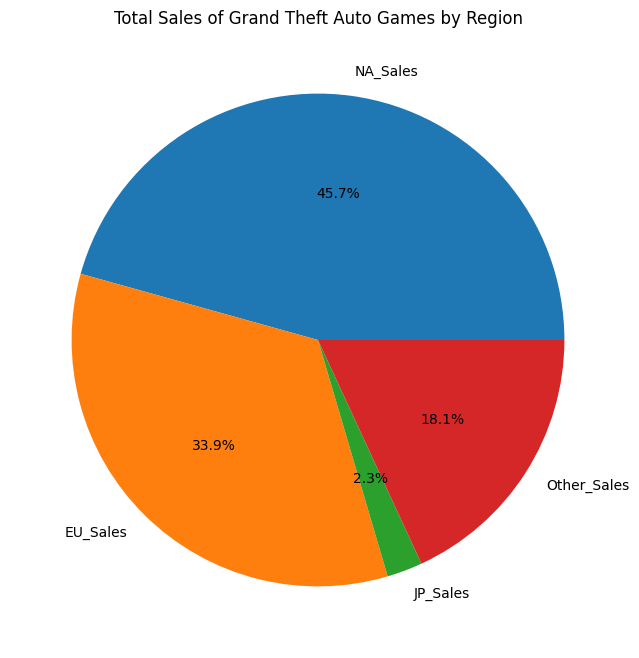

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the file name is 'videogamesales.csv'
file_name = 'videogamesales.csv'
df = pd.read_csv(file_name)

# 1. Add a column of ‘global_sales’ showing the total sales of all the different regions to the data frame
df['global_sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# 2. Sort the DataFrame by 'global_sales' in descending order
df_sorted = df.sort_values(by='global_sales', ascending=False)

# Print the sorted DataFrame
print(df_sorted)

# 3. Plot the total number of copies sold of each genre globally
genre_sales = df.groupby('Genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(10, 6), title='Total Global Sales by Genre')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Genre')
plt.show()

# 4. Filter out only the games containing ‘Grand Theft Auto’ in their name and display specific columns
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False)]
gta_summary = gta_games[['Name', 'Platform', 'Year', 'EU_Sales', 'JP_Sales']].copy()
gta_summary['EU_JP_Sales'] = gta_summary[['EU_Sales', 'JP_Sales']].sum(axis=1)
print(gta_summary)

# 5. Display a pie chart of the total sales of all Grand Theft Auto games combined in North America, Europe, Japan, and other sales
gta_total_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gta_total_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Total Sales of Grand Theft Auto Games by Region')
plt.ylabel('')
plt.show()
